<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-&amp;-Logistic-Regression---R" data-toc-modified-id="Exploratory-Data-Analysis-&amp;-Logistic-Regression---R-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis &amp; Logistic Regression - R</a></span><ul class="toc-item"><li><span><a href="#Graphical-Analysis" data-toc-modified-id="Graphical-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphical Analysis</a></span><ul class="toc-item"><li><span><a href="#Continuous-Data---Boxplots-&amp;-Binary-Scatterplots" data-toc-modified-id="Continuous-Data---Boxplots-&amp;-Binary-Scatterplots-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Continuous Data - Boxplots &amp; Binary Scatterplots</a></span></li></ul></li><li><span><a href="#Descriptive-Analysis----Binary-Logistic-Regression" data-toc-modified-id="Descriptive-Analysis----Binary-Logistic-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Descriptive Analysis -  Binary Logistic Regression</a></span></li><li><span><a href="#Dominance-Analysis" data-toc-modified-id="Dominance-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dominance Analysis</a></span></li><li><span><a href="#General-Dominance-Analysis-of-heart.log.reg" data-toc-modified-id="General-Dominance-Analysis-of-heart.log.reg-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>General Dominance Analysis of heart.log.reg</a></span></li><li><span><a href="#Dominance-Analysis-of-heart.log.reg.final" data-toc-modified-id="Dominance-Analysis-of-heart.log.reg.final-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Dominance Analysis of heart.log.reg.final</a></span><ul class="toc-item"><li><span><a href="#Complete-Dominance" data-toc-modified-id="Complete-Dominance-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Complete Dominance</a></span></li><li><span><a href="#Conditional-Dominance" data-toc-modified-id="Conditional-Dominance-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Conditional Dominance</a></span></li><li><span><a href="#General-Dominance" data-toc-modified-id="General-Dominance-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>General Dominance</a></span></li></ul></li></ul></li></ul></div>

# Analysis of Risk Factors in Heart Diseases
## Exploratory Data Analysis & Logistic Regression - R

This jupyter notebook contains the first part of the exploratory data analysis including a logistic regression model as well as a dominance analysis. All of this was carried out using R.

The aim of the exploratory data analysis is to get a better understanding of the data and finally to investigate how the  attributes that are considered as risk factors are related to the occurence of heart diseases. Therefore, a descriptive appraoch is applied to find out which attributes have a significant effect on heart diseases and whether these effects are positively or negatively related to the occurence of heart diseases. A positively related effect would lead to an increased probability of a heart disease occuring and vice versa.  

---
**Project Title:** Analysis of Risk Factors in Heart Diseases

**Program:** MSc. Applied Information & Data Science

**Supervisor:** Philip Hochuli

**Authors:** Manuel Frei, Nico Schubiger, Anna-Lena Klaus

**Date:** 05.11.2021

---

In [2]:
#loading packages
install.packages("bootStepAIC")
library(bootStepAIC)

install.packages("ggplot2")
library(ggplot2)

package 'bootStepAIC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\freim\AppData\Local\Temp\Rtmpo735SQ\downloaded_packages


Warning message:
"package 'bootStepAIC' was built under R version 3.6.3"Loading required package: MASS



  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [3]:
#getting data
df.heart <- read.csv("https://gitlab.com/mfrrr/hslu_healthcare/-/raw/main/Data/df_heart2_imp2_corrected.csv", header = TRUE, stringsAsFactors = TRUE)

In [4]:
#having a look at the data
head(df.heart)

X.1 X location  age sex cp trestbps chol fbs restecg ... slope target
1 1   0 Cleveland 63  1   1  145      233  1   2       ... 3     0     
2 2   1 Cleveland 67  1   4  160      286  0   2       ... 2     1     
3 3   2 Cleveland 67  1   4  120      229  0   2       ... 2     1     
4 4   3 Cleveland 37  1   3  130      250  0   0       ... 3     0     
5 5   4 Cleveland 41  0   2  130      204  0   2       ... 1     0     
6 6   5 Cleveland 56  1   2  120      236  0   0       ... 1     0     
  trestbps_missing chol_missing fbs_missing restecg_missing thalach_missing
1 0                0            0           0               0              
2 0                0            0           0               0              
3 0                0            0           0               0              
4 0                0            0           0               0              
5 0                0            0           0               0              
6 0                0            0           0               0              
  exang_missing oldpeak_missing slope_missing
1 0             0               0            
2 0             0               0            
3 0             0               0            
4 0             0               0            
5 0             0               0            
6 0             0               0

In [45]:
#creating subset containing only the attributes relevant for the analysis
df.heart.reg <- subset(df.heart, select = -c(X.1, X, location, trestbps_missing, chol_missing, fbs_missing, 
                                             restecg_missing, thalach_missing, exang_missing,
                                             oldpeak_missing, slope_missing))

In [46]:
#having a look at the created subset
head(df.heart.reg)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope target
1 63  1   1  145      233  1   2       150     0     2.3     3     0     
2 67  1   4  160      286  0   2       108     1     1.5     2     1     
3 67  1   4  120      229  0   2       129     1     2.6     2     1     
4 37  1   3  130      250  0   0       187     0     3.5     3     0     
5 41  0   2  130      204  0   2       172     0     1.4     1     0     
6 56  1   2  120      236  0   0       178     0     0.8     1     0

### Graphical Analysis

In this section, the relationship between the attributes (independent variables) and the occurence of heart diseases (dependent variable) is visually inspected. Therefore, the individual attributes are plotted against the dependent variable. This allows to investigate the behavior of the attributes towards the occurence of heart diseases.

It must be noted that only continuous attributes are plotted with boxplots and binary scatter plots within this notebook. The plotting of categorical attributes is done in the jupyter notebook `healthcare_risk-factors-heart-diseases_machine-learning`.

#### Continuous Data - Boxplots & Binary Scatterplots

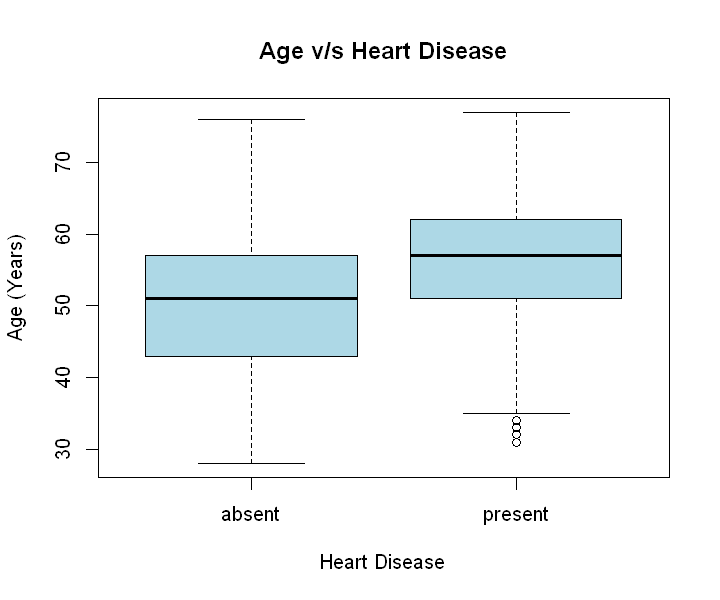

In [47]:
#adjusting plot size
options(repr.plot.width = 6, repr.plot.height = 5)

#creating boxplot: 'age' and 'target' (occurence of heart disease)
boxplot(age ~ target, ylab = "Age (Years)", xlab = "Heart Disease",
        main = "Age v/s Heart Disease", 
        names = c("absent", "present"),
        col = "lightblue", 
        data = df.heart.reg)

It can be seen that the median age is higher for patients with a heart disease than for patients without a heart disease. In other words, there seems to be a difference in age between the patients with regard to the dependent variable; patients with a heart disease were generally a bit older than patients without a heart disease. 

`geom_smooth()` using formula 'y ~ x'


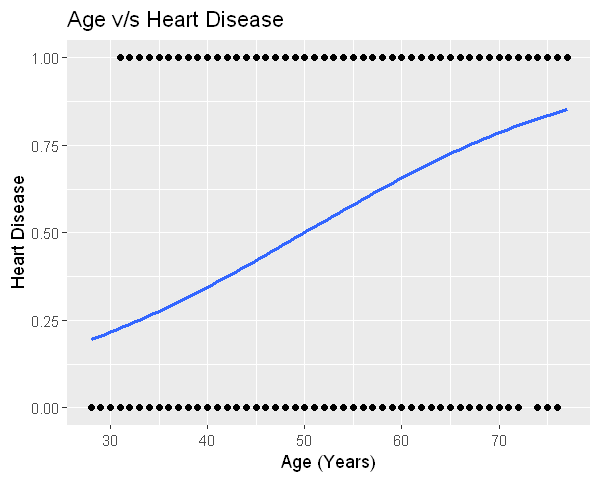

In [52]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating binary scatter plot: 'age' and 'target' (occurence of heart disease)
ggplot(data = df.heart.reg, 
      mapping = aes(y = target,
                    x = age)) +
geom_point() +
geom_smooth(method = "glm",
            se = FALSE,
            method.args = list(family = "binomial")) +
labs(title = "Age v/s Heart Disease", 
    y = "Heart Disease", 
    x = "Age (Years)")

It can be seen that a higher age is associated with higher probabilites of a heart disease being present.

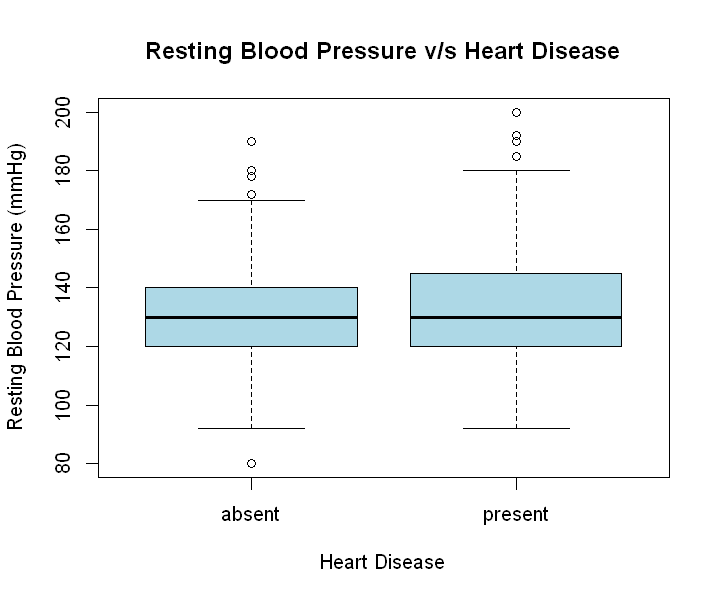

In [55]:
#adjusting plot size
options(repr.plot.width = 6, repr.plot.height = 5)

#creating boxplot: 'trestbps' and 'target' (occurence of heart disease)
boxplot(trestbps ~ target, ylab = "Resting Blood Pressure (mmHg)", xlab = "Heart Disease",
        main = "Resting Blood Pressure v/s Heart Disease",
        names = c("absent", "present"),
        col = "lightblue", 
        data = df.heart.reg)

It can be seen that the median resting blood pressure is about the same level for both patients with and without a heart disease. The boxplot depicting the presence of a heart disease seems to have a slightly higher variance. Overall however, there seems not to be a difference in resting blood pressure between the patients with regard to the dependent variable.

`geom_smooth()` using formula 'y ~ x'


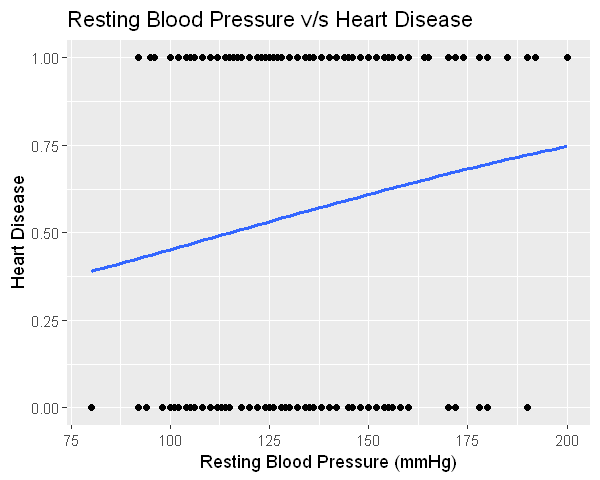

In [57]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating binary scatter plot: 'trestbps' and 'target' (occurence of heart disease)
ggplot(data = df.heart.reg, 
      mapping = aes(y = target,
                    x = trestbps)) +
geom_point() +
geom_smooth(method = "glm",
            se = FALSE,
            method.args = list(family = "binomial")) +
labs(title = "Resting Blood Pressure v/s Heart Disease", 
    y = "Heart Disease", 
    x = "Resting Blood Pressure (mmHg)")

The binary scatter plot shows a clearer picture of the relation. It indicates that a higher resting blood pressure is associated with a higher probability of a heart disease being present.

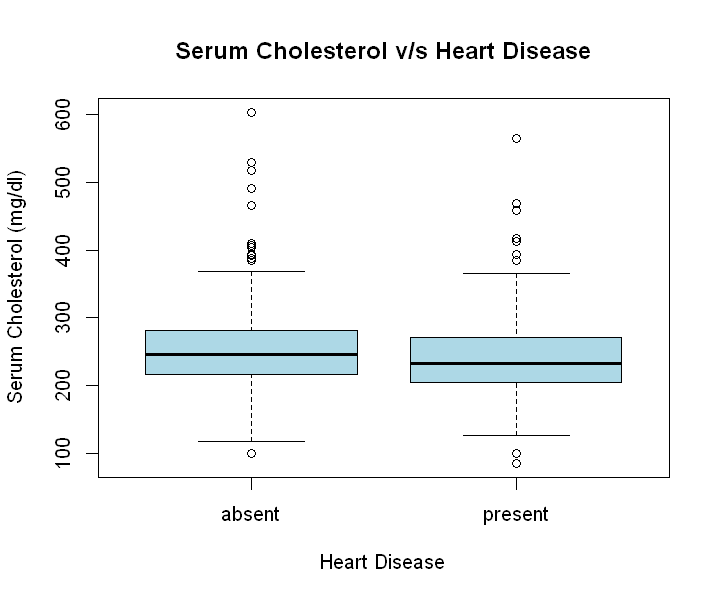

In [1]:
#adjusting plot size
options(repr.plot.width = 6, repr.plot.height = 5)

#creating boxplot: 'chol' and 'target' (occurence of heart disease)
boxplot(chol ~ target, ylab = "Serum Cholesterol (mg/dl)", xlab = "Heart Disease",
        main = "Serum Cholesterol v/s Heart Disease",
        names = c("absent", "present"),
        col = "lightblue", 
        data = df.heart.reg)

It can be seen that the median serum cholesterol is slightly higher for patients with a heart disease than for patients without a heart disease.

`geom_smooth()` using formula 'y ~ x'


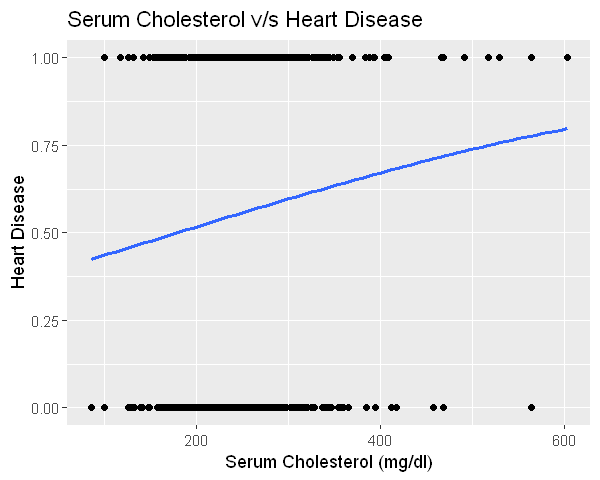

In [61]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating binary scatter plot: 'chol' and 'target' (occurence of heart disease)
ggplot(data = df.heart.reg, 
      mapping = aes(y = target,
                    x = chol)) +
geom_point() +
geom_smooth(method = "glm",
            se = FALSE,
            method.args = list(family = "binomial")) +
labs(title = "Serum Cholesterol v/s Heart Disease", 
    y = "Heart Disease", 
    x = "Serum Cholesterol (mg/dl)")

The binary scatterplot seems to confirm the findings already seen in the boxplot. Namely that patients with a heart disease have higher cholesterol on average.

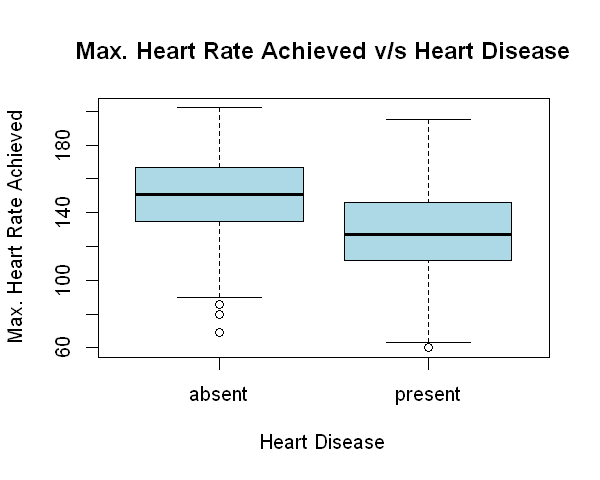

In [62]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating boxplot: 'thalach' and 'target' (occurence of heart disease)
boxplot(thalach ~ target, ylab = "Max. Heart Rate Achieved", xlab = "Heart Disease",
        main = "Max. Heart Rate Achieved v/s Heart Disease",
        names = c("absent", "present"),
        col = "lightblue", 
        data = df.heart.reg)

It can be seen that the median max. heart rate achieved is lower for patients with a heart disease than for patients without a heart disease. In other words, there seems to be a difference in the max. heart rate achieved between the patients with regard to the dependent variable; patients with a heart disease had generally a lower max. heart rate achieved than patients without a heart disease.

`geom_smooth()` using formula 'y ~ x'


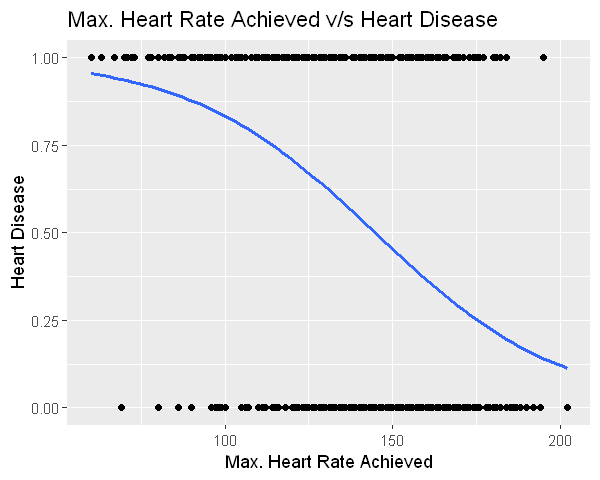

In [63]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating binary scatter plot: 'thalach' and 'target' (occurence of heart disease)
ggplot(data = df.heart.reg, 
      mapping = aes(y = target,
                    x = thalach)) +
geom_point() +
geom_smooth(method = "glm",
            se = FALSE,
            method.args = list(family = "binomial")) +
labs(title = "Max. Heart Rate Achieved v/s Heart Disease", 
    y = "Heart Disease", 
    x = "Max. Heart Rate Achieved")

It can be seen that a lower max. heart rate achieved is associated with higher probabilites of a heart disease being present.

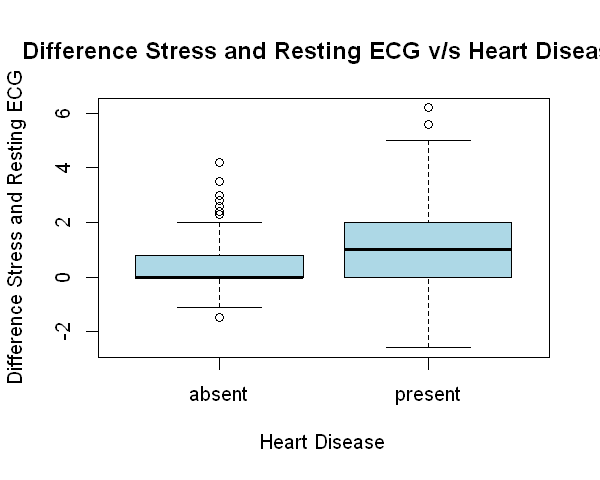

In [68]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating boxplot: 'oldpeak' and 'target' (occurence of heart disease)
boxplot(oldpeak ~ target, ylab = "Difference Stress and Resting ECG", xlab = "Heart Disease",
        main = "Difference Stress and Resting ECG v/s Heart Disease",
        names = c("absent", "present"),
        col = "lightblue", 
        data = df.heart.reg)

It can be seen that the median ST depression is higher for patients with a heart disease than for patients without a heart disease. In addition, the boxplot depicting patients with a heart disease has a larger variance. This aligns with theory and practice since ST depression refers to the relative difference between the stress and the resting ECG's ST depression, which should be around zero for patients with normal conditions (positve and negative values are therefore refered to as bad condition). In other words, there seems to be a difference in the ST depression between the patients with regard to the dependent variable; patients with a heart disease had generally a larger difference in the ST depression between the two ECGs, whereby the ST depressions of patients without a heart disease did not change substantially.

`geom_smooth()` using formula 'y ~ x'


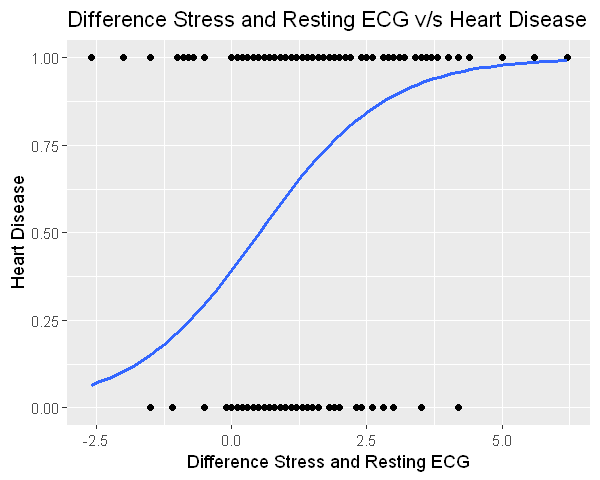

In [69]:
#adjusting plot size
options(repr.plot.width = 5, repr.plot.height = 4)

#creating binary scatter plot: 'thalach' and 'target' (occurence of heart disease)
ggplot(data = df.heart.reg, 
      mapping = aes(y = target,
                    x = oldpeak)) +
geom_point() +
geom_smooth(method = "glm",
            se = FALSE,
            method.args = list(family = "binomial")) +
labs(title = "Difference Stress and Resting ECG v/s Heart Disease", 
    y = "Heart Disease", 
    x = "Difference Stress and Resting ECG")

The binary scatter plot indicates that a higher positive difference is associated with having a heart disease. But we can also see that larger negative differences are more numerous when a heart disease is present and that the differences are on average closer to 0 when no heart disease is present. 

### Descriptive Analysis -  Binary Logistic Regression

With a binary logistic regression model the significance of the attributes in relation to the occurence of heart diseases is investigated. In other words: How are the attributes related to the occurence of heart diseases? 

As already mentioned at the beginning of this document, a descriptive approach and not a predictive approach is used to answer the question stated above.

Hence, a cross-validation of the model with a train and a test data set is waived to have as many observations as possible at hand to determine the signifance of the individual attributes. 

In [71]:
#declaring attributes as factors
df.heart.reg$sex <- factor(df.heart.reg$sex)
df.heart.reg$cp <- factor(df.heart.reg$cp, ordered = TRUE, levels = c(4, 3, 2, 1))
df.heart.reg$fbs <- factor(df.heart.reg$fbs, ordered = TRUE, levels = c(0, 1))
df.heart.reg$restecg <- factor(df.heart.reg$restecg, ordered = TRUE, levels = c(0, 1, 2))
df.heart.reg$exang <- factor(df.heart.reg$exang)
df.heart.reg$slope <- factor(df.heart.reg$slope, ordered = TRUE, levels = c(1, 2, 3))
df.heart.reg$target <- factor(df.heart.reg$target, ordered = TRUE, levels = c(0, 1))

Since some attributes are ordinally scaled, the order of the attribute levels must be defined to later be interpreted correctly by R. The order of the levels is defined as followed: **from normal condition to bad condition**

An example for comprehension with the attribute `cp` which encodes the chest-pain type of the patient with the following levels:
* 1 = typical angina (worst possible condition; indication of heart disease)
* 2 = atypical angina (bad condition; better condition than 1 but worse condition than 3)
* 3 = non-anginal pain (bad condition; better condition 2 but worse condition than 4)
* 4 = asymptotic (normal condition)

For the regression analysis those levels have been ordered as followed based on the definition of orders above from normal condition to bad condition: `levels = c(4, 3, 2, 1)`

As a first step, the starting model is fitted including all attributes of the subset created prior to the analysis. A variable selection right at the beginning of the model development is waived because the goal is to determine all potential attributes that could have an effect on the occurence of heart diseases:

In [72]:
#fitting model
heart.log.reg  <- glm(target ~., 
                     family = "binomial", 
                     data = df.heart.reg)
summary(heart.log.reg)


Call:
glm(formula = target ~ ., family = "binomial", data = df.heart.reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7428  -0.5711   0.2786   0.6217   2.5903  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.1941626  1.2347734  -1.777 0.075572 .  
age          0.0253460  0.0112642   2.250 0.024440 *  
sex1         1.4541492  0.2387600   6.090 1.13e-09 ***
cp.L        -0.9246163  0.2603194  -3.552 0.000383 ***
cp.Q         1.2502462  0.2360366   5.297 1.18e-07 ***
cp.C         0.2610890  0.2193009   1.191 0.233830    
trestbps     0.0009967  0.0051699   0.193 0.847117    
chol         0.0031021  0.0016368   1.895 0.058061 .  
fbs.L        0.2771940  0.1874457   1.479 0.139195    
restecg.L   -0.0115323  0.1664494  -0.069 0.944764    
restecg.Q   -0.0898874  0.2055759  -0.437 0.661932    
thalach     -0.0142039  0.0042805  -3.318 0.000906 ***
exang1       0.8951129  0.2105594   4.251 2.13e-05 ***
oldpeak      0.4477639  0.

The AIC value in the summary of the model serves as a measure of the model fit. A lower AIC value stands for a better model fit which can be interpreted such as that the model fits the data more accurately. In opposite, a higher AIC value stands for a worse model fit. 

By applying a stepwise algorithm to minimize the AIC value, it is possible to derive a model with a better fit. For this purpose the function `stepAIC()` is applied.

In [73]:
#applying algorithm to minimize AIC value
heart.log.reg.final  <- stepAIC(heart.log.reg)

Start:  AIC=804.86
target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + 
    exang + oldpeak + slope

           Df Deviance    AIC
- restecg   2   773.06 801.06
- trestbps  1   772.90 802.90
<none>          772.86 804.86
- fbs       1   775.08 805.08
- chol      1   776.52 806.52
- slope     2   778.62 806.62
- age       1   777.98 807.98
- thalach   1   784.08 814.08
- exang     1   791.06 821.06
- oldpeak   1   793.40 823.40
- sex       1   813.09 843.09
- cp        3   862.52 888.52

Step:  AIC=801.06
target ~ age + sex + cp + trestbps + chol + fbs + thalach + exang + 
    oldpeak + slope

           Df Deviance    AIC
- trestbps  1   773.11 799.11
<none>          773.06 801.06
- fbs       1   775.41 801.41
- chol      1   776.62 802.62
- slope     2   778.72 802.72
- age       1   778.39 804.39
- thalach   1   785.21 811.21
- exang     1   791.44 817.44
- oldpeak   1   793.52 819.52
- sex       1   813.75 839.75
- cp        3   862.92 884.92

Step:  AIC=799.11
tar

It can be seen that the algorithm took the starting model stored in `heart.log.reg` with an AIC value of 804.86 as the starting point of the optimization. After two steps the final model with a minimal AIC value of 799.11 was derived. This model contains less attributes than the starting model and the attributes `trestbps` and `restecg` were removed.

In [15]:
#having a look at the summary
summary(heart.log.reg.final)


Call:
glm(formula = target ~ age + sex + cp + chol + fbs + thalach + 
    exang + oldpeak + slope, family = "binomial", data = df.heart.reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7540  -0.5694   0.2783   0.6176   2.5831  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.051740   1.068893  -1.919 0.054921 .  
age          0.025891   0.010860   2.384 0.017124 *  
sex1         1.458351   0.238045   6.126 8.99e-10 ***
cp.L        -0.923233   0.259116  -3.563 0.000367 ***
cp.Q         1.246266   0.234903   5.305 1.12e-07 ***
cp.C         0.255614   0.218168   1.172 0.241341    
chol         0.003070   0.001620   1.894 0.058193 .  
fbs.L        0.290022   0.184365   1.573 0.115700    
thalach     -0.014516   0.004198  -3.458 0.000545 ***
exang1       0.902996   0.209308   4.314 1.60e-05 ***
oldpeak      0.447759   0.101089   4.429 9.45e-06 ***
slope.L      0.067931   0.275830   0.246 0.805466    
slope.Q     -0.347122   0.1

Before the interpretation, a look at the encoding of the attribute levels in the model is taken. As the attributes `cp`, `fbs` and `slope` were declared as ordered factors, a series of polynomial functions was fitted to the factor levels:
* `.L`: linear function for attributes with two levels
* `.Q`: quadratic function for attributes with three levels
* `.C`: cubic function for attributes with four levels

Hence, the coefficients in the summary can be decoded as followed:
* `cp.L`: 3 (= non-anginal pain)
* `cp.Q`: 2 (= atypical angina)
* `cp.C`: 1 (= typical angina)
* `fbs.L`: 1 (= fasting blood sugar > 120mg/dl)
* `slope.L`: 2 (= flat slope)
* `slope.Q`: 3 (= downsloping)

**Interpretation of summary:**

To find out which attributes have a significant effect on heart diseases and whether these effects are positively or negatively related to the occurence of heart diseases, a look at the p-value and the coefficient estimate of the individual attributes is taken:
* Coefficients with p-values smaller than the significance level of 5% are statistically significant. Hence, it can be assumed from the model that the attributes related to these coefficients have an effect on the occurence of heart diseases.
* The coefficient estimates associated with the corresponding attributes represent the expected change in log odds of having a heart disease. Positive values indicate a positively related effect of the attribute on the occurence of heart diseases and vice versa, i.e. would lead to an increased probability of a heart disease occuring and vice versa.

The following attributes or attribute levels show a significant p-value: `age`, `sex1`, `cp.L`, `cp.Q`, `thalach`, `exang1` and `oldpeak`. From the model it can be assumed that those attributes have a signifcant effect on the occurence of heart diseases.
* `age`: The regression coefficient is positive indicating a positive effect on the occurence of heart diseases. From the model it can be assumed that the older a person gets, the more likely the occurence of a heart disease is.
* `sex1`: The regression coefficient is positive indicating that there is a difference between men and women with regard to the occurence of heart diseases. In this model, men are more likely to suffer from a heart disease than women. 
* `cp.L`: The regression coefficient is negative indicating that there is a difference between patients with no chest pain (asymptotic) and patients with non-anginal chest pain. In this model, patients with non-anginal chest pain are less likely to suffer from a heart disease than patients with no chest pain (asymptotic).
* `cp.Q`: The regression coefficient is positive indicating that there is a difference between patients with no chest pain (asymptotic) and patients with atypical angina. In this model, patients with atypical angina are more likely to suffer from a heart disease than patients with no chest pain (asymptotic).
* `thalach`: The regression coefficient is negative indicating a negative effect on the occurence of heart diseases. From the model it can be assumed that the higher the max. heart rate achieved of a person is, the less likely the occurence of a heart disease is.
* `exang1`: The regression coefficient is positive indicating that there is a difference between patients with induced angina after an exercise and patients with no induced angina after an exercise with regard to the occurence of heart diseases. In this model, people with exercise induced angina are more likely to suffer from a heart disease than people with no exercise induced angina. 
* `oldpeak`: The regression coefficient is positive indicating a positive effect on the occurence of heart diseases. From the model it can be assumed that the higher the difference between the stress and resting ECG is, the more likely the occurence of a heart disease is. 

In conlusion, according to the data and the model applied in this section, it can be assumed that attributes mentioned above play a role in the occurence of heart disease. Age, gender, non-anginal chest pain, exercise induced angina and the difference between the stress and resting ECG have a positive effect whereby atypical angina and the max. heart rate achieved have a negative effect on the occurence of heart diseases. 

### Dominance Analysis

Since one of our goals is to determine the most important predictors for heart diseases in the descriptive model, a dominance analysis is performed. Dominance analyses are used to determine the relative importance of predictors in a regression analysis, whereby importance is defined as a qualitative comparison between pairs of predictors.

There are three types of dominance:

`Complete Dominance`: A predictor completely dominates another predictor if it is dominant over all possible subset models (which do not contain the two predictors to be compared). As an example, in a model with 4 predictors, P1 completely dominates P2 when the additional R-square contribution of P1 is higher than that of P2 for all subset models (null model, model consisting of P3, model consisting of P4, and model consisting of P3 and P4).

`Conditional Dominance`: A predictor conditionally dominates another predictor, when the predictor’s averaged additional contribution within each model size is larger than that of the other predictor. The model size is given by the number of predictors included in a given model. The conditional dominance between a pair of predictors can not be determined, if a predictor’s averaged additional contribution is larger for some model sizes but not for all. 

`General Dominance`: A predictor generally dominates another predictor, if its overall averaged additional R2 contribution is larger than that of the other one. 


In [18]:
install.packages("dominanceanalysis")
install.packages("reshape2")
require(dominanceanalysis)
library(reshape2)


package 'dominanceanalysis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nicos\AppData\Local\Temp\Rtmpc7FruR\downloaded_packages
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nicos\AppData\Local\Temp\Rtmpc7FruR\downloaded_packages


Loading required package: dominanceanalysis
Warning message:
"package 'dominanceanalysis' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"

### General Dominance Analysis of heart.log.reg

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


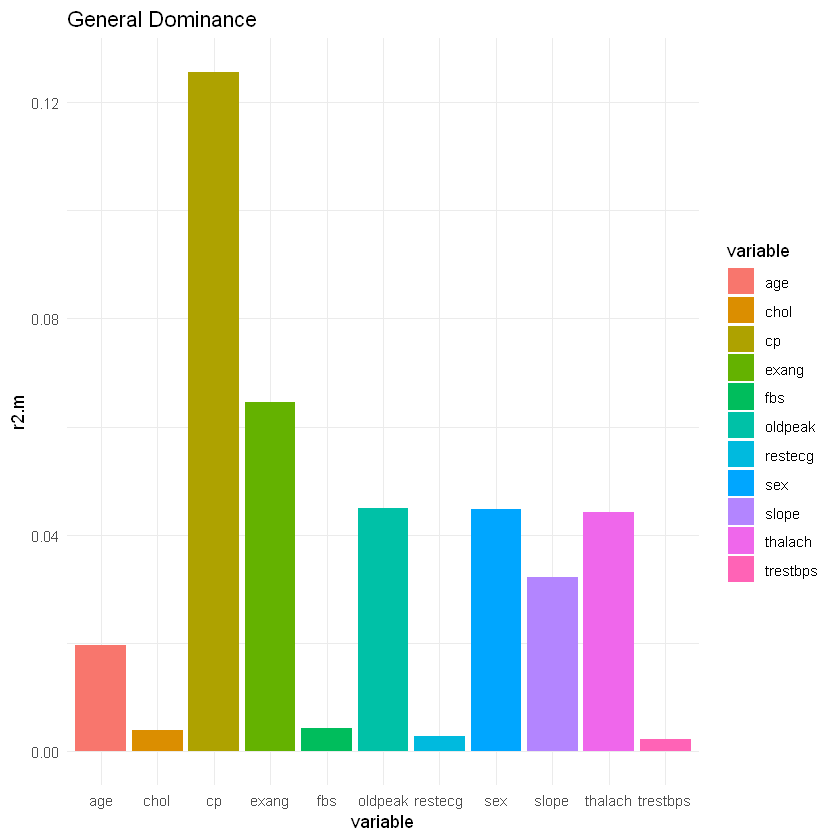

In [19]:
# running the dominance analysis
heart.dominance <- dominanceAnalysis(heart.log.reg)

#plotting general dominance of heart.log.reg
plot(heart.dominance, which.graph = "general", fit.function = "r2.m")


The results reconfirm that the variables restecg and trestbps are the least important for the model, as seen in the AIC optimization.

### Dominance Analysis of heart.log.reg.final

In [20]:
# running the dominance analysis
heart.dominance.final <- dominanceAnalysis(heart.log.reg.final)
getFits(heart.dominance.final, "r2.m") #using McFadden index

Dominance analysis fit matrices
* Fit index:  r2.m 
                                                  age   sex    cp  chol   fbs
1                                               0.060 0.070 0.227 0.006 0.010
age                                                   0.068 0.198 0.004 0.002
sex                                             0.058       0.199 0.012 0.006
cp                                              0.032 0.042       0.002 0.009
chol                                            0.058 0.075 0.223       0.009
fbs                                             0.052 0.066 0.226 0.005      
thalach                                         0.018 0.048 0.152 0.005 0.009
exang                                           0.034 0.046 0.123 0.003 0.009
oldpeak                                         0.031 0.061 0.167 0.004 0.008
slope                                           0.035 0.060 0.175 0.005 0.006
age+sex                                                     0.173 0.009 0.001
age+cp                                                0.043       0.001 0.003
age+chol                                              0.073 0.196       0.002
age+fbs                                               0.067 0.200 0.003      
age+thalach                                           0.050 0.147 0.004 0.004
age+exang                                             0.047 0.112 0.002 0.003
age+oldpeak                                           0.061 0.156 0.003 0.003
age+slope                                             0.060 0.161 0.003 0.002
sex+cp                                          0.032             0.005 0.006
sex+chol                                        0.055       0.193       0.006
sex+fbs                                         0.053       0.199 0.011      
sex+thalach                                     0.020       0.138 0.010 0.006
sex+exang                                       0.035       0.111 0.006 0.006
sex+oldpeak                                     0.031       0.146 0.009 0.005
sex+slope                                       0.035       0.155 0.009 0.004
cp+chol                                         0.031 0.046             0.008
cp+fbs                                          0.026 0.040       0.002      
cp+thalach                                      0.013 0.034       0.003 0.008
cp+exang                                        0.022 0.033       0.002 0.009
cp+oldpeak                                      0.019 0.040       0.002 0.008
cp+slope                                        0.020 0.039       0.002 0.007
chol+fbs                                        0.050 0.072 0.222            
chol+thalach                                    0.017 0.054 0.150       0.008
chol+exang                                      0.033 0.049 0.122       0.009
chol+oldpeak                                    0.029 0.065 0.164       0.008
chol+slope                                      0.033 0.064 0.173       0.006
fbs+thalach                                     0.014 0.046 0.152 0.004      
fbs+exang                                       0.028 0.043 0.123 0.003      
fbs+oldpeak                                     0.026 0.058 0.167 0.004      
fbs+slope                                       0.031 0.057 0.176 0.004      
thalach+exang                                   0.014 0.037 0.096 0.003 0.008
thalach+oldpeak                                 0.006 0.044 0.113 0.004 0.007
thalach+slope                                   0.014 0.047 0.136 0.005 0.007
exang+oldpeak                                   0.021 0.046 0.107 0.002 0.008
exang+slope                                     0.024 0.044 0.110 0.003 0.007
oldpeak+slope                                   0.024 0.058 0.148 0.004 0.006
age+sex+cp                                                        0.004 0.002
age+sex+chol                                                0.169       0.001
age+sex+fbs                                                 0.174 0.008      
age+sex+thalach                                 

In the first row, the values for each univariate model are depicted, whereas the following rows show the additional contribution of each predictor, when added to the subset model of the first row. If we look at the first row in the exang column we see that for the univariate model containing *execercise induced angina* (`exang`) a R2M (McFadden index) of **0.165** is produced. If we add *chest pain type* (`cp`) to this model, R2M increases by **0.123** (which is shown in the `exang` row under the `cp` column of the table). However, if we add *age* (`age`) to the univariate model containing `exang`, R2M only increases by **0.034** (which is shown in the `exang` row under the `age` column). Therefore we can conclude that `cp` dominates `age` when added to the `exang` subset model, since the additional contribution of `cp` (**0.123**) to this model is greater than the one of `age` (**0.034**).

#### Complete Dominance

In [21]:
# complete dominance matrix 
dominanceMatrix(heart.dominance.final, type="complete", fit.functions = "r2.m", ordered = TRUE)

cp  exang sex oldpeak thalach slope age fbs chol
cp      0.5 1.0   1.0 1.0     1.0     1.0   1.0 1.0 1.0 
exang   0.0 0.5   0.5 0.5     0.5     1.0   1.0 1.0 1.0 
sex     0.0 0.5   0.5 0.5     0.5     0.5   1.0 1.0 1.0 
oldpeak 0.0 0.5   0.5 0.5     0.5     1.0   0.5 1.0 1.0 
thalach 0.0 0.5   0.5 0.5     0.5     0.5   0.5 1.0 1.0 
slope   0.0 0.0   0.5 0.0     0.5     0.5   0.5 0.5 1.0 
age     0.0 0.0   0.0 0.5     0.5     0.5   0.5 0.5 0.5 
fbs     0.0 0.0   0.0 0.0     0.0     0.5   0.5 0.5 0.5 
chol    0.0 0.0   0.0 0.0     0.0     0.0   0.5 0.5 0.5

The complete dominance matrix summarizes the results of the complete dominance analysis.
If the predictor in the first column completely dominates the predictor in another column, a value of 1 is shown.
If the predictor in the first column is completely dominated by a predictor in another column, a value of 0 is shown.
A value of 0.5 is shown if no complete dominance can be established. 
For example we can see that `cp` completely dominates all the other variables
and that `chol` is dominated by all variables except `age` and `fbs`


#### Conditional Dominance

In [25]:
# conditional dominance analysis
contributionByLevel(heart.dominance.final, fit.functions="r2.m")

Contribution by level
* Fit index:  r2.m 
 level   age   sex    cp  chol   fbs thalach exang oldpeak slope
     0 0.060 0.070 0.227 0.006 0.010   0.122 0.165   0.110 0.100
     1 0.040 0.058 0.183 0.005 0.007   0.085 0.121   0.079 0.066
     2 0.027 0.051 0.152 0.004 0.006   0.061 0.089   0.058 0.044
     3 0.019 0.045 0.128 0.004 0.005   0.043 0.066   0.044 0.029
     4 0.014 0.041 0.111 0.004 0.004   0.032 0.049   0.034 0.020
     5 0.010 0.038 0.097 0.003 0.003   0.023 0.037   0.027 0.013
     6 0.008 0.035 0.087 0.003 0.003   0.017 0.027   0.023 0.009
     7 0.006 0.034 0.078 0.003 0.002   0.013 0.020   0.019 0.006
     8 0.005 0.032 0.071 0.003 0.002   0.010 0.015   0.016 0.004

The table above shows the additional average contribution of the predictors for each level.
The level indicates the number of predictors in the model (the model size). 
Let's look at it graphically and with the conditional dominance matrix, since they are simpler to interpret.

cp  exang oldpeak sex thalach slope age chol fbs
cp      0.5 1.0   1.0     1.0 1.0     1.0   1.0 1.0  1.0
exang   0.0 0.5   0.5     0.5 1.0     1.0   1.0 1.0  1.0
oldpeak 0.0 0.5   0.5     0.5 0.5     1.0   1.0 1.0  1.0
sex     0.0 0.5   0.5     0.5 0.5     0.5   1.0 1.0  1.0
thalach 0.0 0.0   0.5     0.5 0.5     1.0   1.0 1.0  1.0
slope   0.0 0.0   0.0     0.5 0.0     0.5   0.5 1.0  1.0
age     0.0 0.0   0.0     0.0 0.0     0.5   0.5 1.0  1.0
chol    0.0 0.0   0.0     0.0 0.0     0.0   0.0 0.5  0.5
fbs     0.0 0.0   0.0     0.0 0.0     0.0   0.0 0.5  0.5

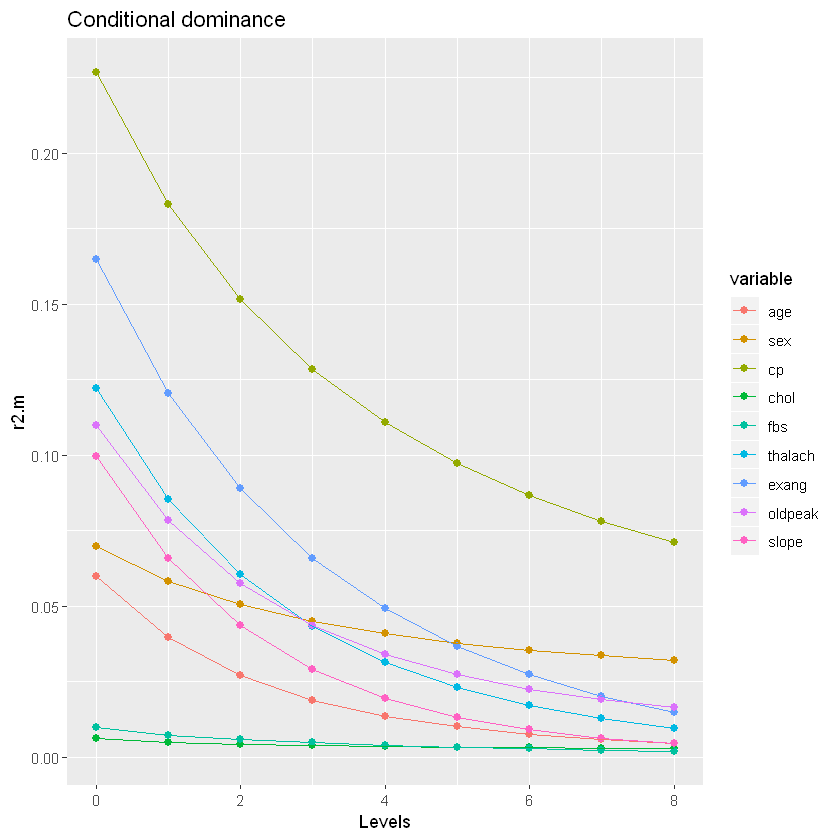

In [27]:
# plotting conditional dominance
plot(heart.dominance.final, which.graph = "conditional", fit.function = "r2.m")
# retrieving conditional dominance matrix
dominanceMatrix(heart.dominance.final, type="conditional", fit.functions = "r2.m", ordered = TRUE)

differences to complete dominance:
- `exang` conditionally dominates `thalach` but not completely
- `oldpeak` conditionally dominates `age` but not completeley
- `thalach` conditionally dominates `slope` and `age` but not completely
- `slope` conditionally dominates `fbs` but not completely
- `age` conditionally dominates `chol` and `fbs` but not completely

This means that the former attributes's additional averaged contribution to the model is larger than that of the latter but that it is not larger for ALL subset models (no complete dominance).

#### General Dominance

Average Contribution by predictor
       age   sex    cp  chol   fbs thalach exang oldpeak slope
r2.m 0.021 0.045 0.126 0.004 0.005   0.045 0.065   0.045 0.032

cp  exang oldpeak thalach sex slope age fbs chol
cp      0.5 1.0   1.0     1.0     1.0 1.0   1.0 1.0 1.0 
exang   0.0 0.5   1.0     1.0     1.0 1.0   1.0 1.0 1.0 
oldpeak 0.0 0.0   0.5     1.0     1.0 1.0   1.0 1.0 1.0 
thalach 0.0 0.0   0.0     0.5     1.0 1.0   1.0 1.0 1.0 
sex     0.0 0.0   0.0     0.0     0.5 1.0   1.0 1.0 1.0 
slope   0.0 0.0   0.0     0.0     0.0 0.5   1.0 1.0 1.0 
age     0.0 0.0   0.0     0.0     0.0 0.0   0.5 1.0 1.0 
fbs     0.0 0.0   0.0     0.0     0.0 0.0   0.0 0.5 1.0 
chol    0.0 0.0   0.0     0.0     0.0 0.0   0.0 0.0 0.5

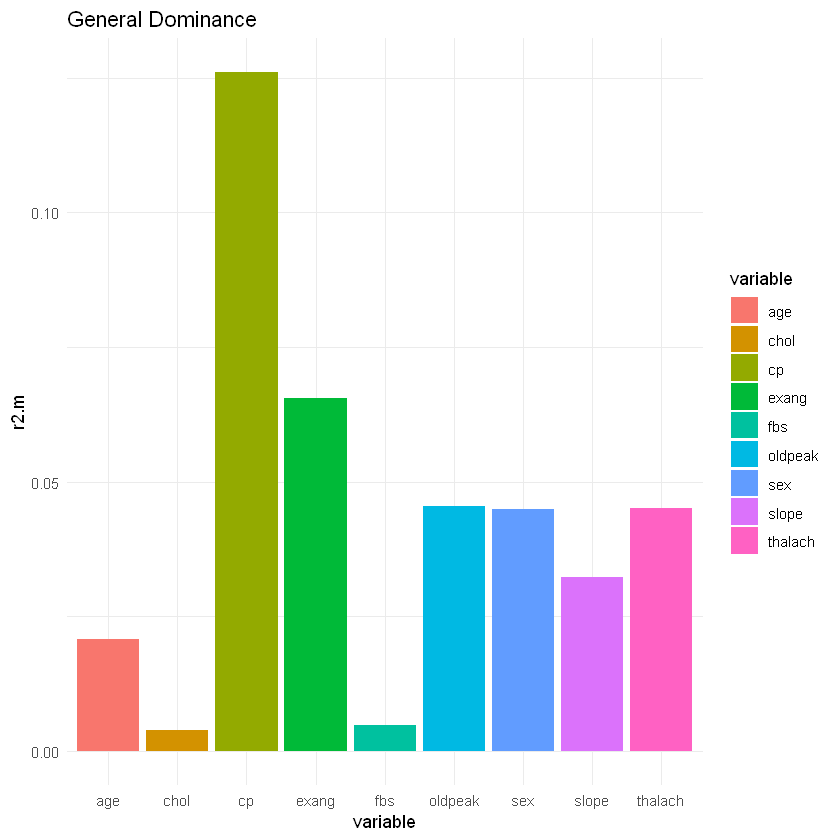

In [23]:
# analyzing general dominance
averageContribution(heart.dominance.final, fit.functions = "r2.m")
plot(heart.dominance.final, which.graph = "general", fit.function = "r2.m")
dominanceMatrix(heart.dominance.final, type="general", fit.function ="r2.m", ordered = TRUE)


The general dominance calculates the means from the conditional dominance analysis for each predictor and helps to establish a rank of importance among the predictors. We can conclude that the chest pain type (`cp`) is clearly the most important predictor to explain heart disease occurrence, followed by exercise induced angina (`exang`), relative difference of ST depression between stress and rest ECG (`oldpeak`) , max heart rate achieved (`thalach`) and `sex` (r2.m = 0.0449).

Ranking: 
1. `cp` (0.1260)
2. `exang` (0.0656)
3. `oldpeak` (0.0455)
4. `thalach` (0.0451)
5. `sex` (0.0449)
6. `slope` (0.0324)
7. `age` (0.0209)
8. `fbs` (0.0047)
9. `chol` (0.0039)